In [263]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs


'''cap = pd.read_csv("/Users/houzhuo/Downloads/capdata3.csv")
robot    = pd.read_csv("/Users/houzhuo/Downloads/robot.csv")
full = pd.concat([cap,robot],axis=1)
dataset = pd.concat([full['22'],full['23'],full['24'],full['25'],full['26'],full['27'],full['28'],full['29'],full['30'],
                    full['49'],full['50'],full['51'],full['52'],full['53'],full['54'],full['55'],full['56'],full['57'],
                     full['Shoulder_pitch_R'] ] , axis=1 )
dataset.head()'''


f1 = pd.read_csv("/Users/houzhuo/Downloads/data2/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data2/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data2/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data2/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_04/07_04.csv")
cap = pd.concat([f1,f2,f3,f5,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data2/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data2/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data2/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data2/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data2/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t5,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()
#dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],
#                     full['10'],full['11'],full['12'],full['13'],full['14'],full['15'],full['16'],full['17'],full['18']
#    ,full['Shoulder_pitch_R'] ] , axis=1 )
#dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],
#                     full['10'],full['11'],full['12'],full['13'],full['14'],full['15'],full['16'],full['17'],full['18']
#    ,full['Shoulder_pitch_R'] ] , axis=1 )

dataset = pd.concat([full['3']#,full['2'],full['3']
    ,full['Shoulder_pitch_R'] ] , axis=1 )

'''values = dataset.values
groups = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()'''

dataset.describe()

(1148, 44) (1148, 18) (1148, 26)


,3,Shoulder_pitch_R
count,1148.000000,1148.000000
mean,73.655641,-25.786052
std,10.121899,390.715185
min,46.848000,-1237.000000
25%,67.223000,-321.183468
50%,76.671000,63.447368
75%,81.176000,281.743421
max,94.122000,731.000000


IndexError: index 2 is out of bounds for axis 1 with size 2

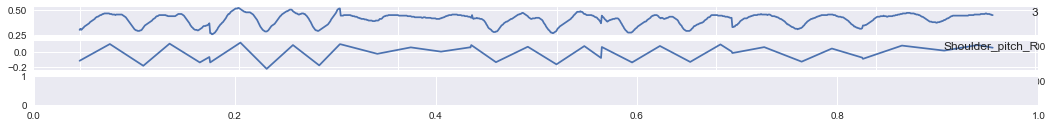

In [264]:
values = dataset.values

n_features=1
for i in range(n_features):
    for j in range(len(values[:,i])):
        values[:,i][j] =int(values[:,i][j])/180


for j in range(len(values[:,-1])):
    values[:,-1][j] =int(values[:,-1][j])/5600
        
groups = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
values[:,6]

In [77]:
full_test = pd.concat([f5,t6],axis=1)
full_test.describe()

dataset_test = pd.concat([full_test['1']/180,full_test['2']/180,full_test['3']/180,
                     full_test['10']/180,full_test['11']/180,full_test['12']/180
    ,full_test['Forearm_R']/5600 ] , axis=1 )
dataset_test.shape

(164, 7)

In [265]:
from sklearn import preprocessing
values = dataset.values
print(values.shape)
n_features=1


train = values[0:820,:]
test = values[820:,:]

n_obs = n_features
train_X_pre,train_y_pre = train[:,:n_obs],train[:,-1]
test_X_pre,test_y_pre = test[:,:n_obs],test[:,-1]#第一个多少行
print(train_X_pre.shape,train_y_pre.shape)

(1148, 2)
(820, 1) (820,)


In [266]:
train_X=[]
train_y=[]
test_y=[]
test_X=[]
time_size = 164
for i in range(5):
    train_X.append(train_X_pre[i*time_size:(i+1)*time_size])
    train_y.append(train_y_pre[i*time_size:(i+1)*time_size])
for i in range(2):
    test_X.append(test_X_pre[i*time_size:(i+1)*time_size])
    test_y.append(test_y_pre[i*time_size:(i+1)*time_size])
np.array(train_y).shape

(5, 164)

In [267]:
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)
'''img_rows = 164
img_cols = 6
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)'''
print(train_y.shape)

(5, 164)


Epoch 1/1
2/2 [==============================] - 2s 1s/step


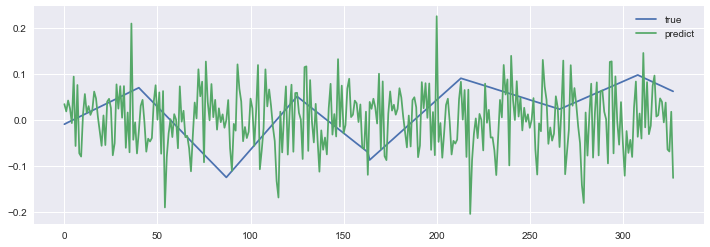

In [269]:
# example of making predictions for a regression problem
from keras.models import Sequential
from sklearn.datasets import make_regression
from keras.layers import LeakyReLU, Dropout
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


def baseline_model():
    # create model
    model = Sequential()
    #model.add(Conv2D(32, kernel_size=(2, 2),
    #                 activation='relu',
    #             padding="same",
    #             input_shape=input_shape))
    #model.add(LeakyReLU(alpha=0.1))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    
    #model.add(Conv2D(16, (2, 2), padding="same"))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Conv2D(32, (2, 2), padding="same"))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Dropout(0.25))
    model.add(Dense(164,input_shape=(164,1),activation='relu'))
    
    #model.add(Dense(4,input_dim=1))#16 4
    model.add(LeakyReLU(alpha=0.15))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    #model.add(Dense(32))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(Dense(128))
    #model.add(LeakyReLU(alpha=0.15))
    #model.add(Dense(128))
    #model.add(LeakyReLU(alpha=0.15))
    
    #model.add(Dense(8))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(Dense(16,activation='relu'))
    #model.add(Dense(32,activation='relu'))
    #model.add(Flatten())
   # model.add(Dense(128))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(Dense(16,activation = 'linear'))
    model.add(Dense(164,activation = 'linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=1000, batch_size=1, verbose=1)


'''model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',padding="same",
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='linear'))'''



estimator.fit(train_X, train_y)

ynew = estimator.predict(test_X)
plt.figure()
plt.plot(np.array(test_y).reshape(328,1), label = 'true')#.reshape(1000,1).reshape(328,1)
plt.plot(np.array(ynew).reshape(328,1), label = 'predict')#.reshape(328,1)
plt.legend()
plt.show()

#### 